In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.ticker import PercentFormatter
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

## Getting the data

Reading data with sentiment analysis

In [2]:
gw_sent=pd.read_csv('data/sentiment_analysis/global_warming_sent.csv',index_col='Unnamed: 0')
ab_sent=pd.read_csv('data/sentiment_analysis/abortion_sent.csv',index_col='Unnamed: 0')
gi_sent=pd.read_csv('data/sentiment_analysis/gender_inequality_sent.csv',index_col='Unnamed: 0')
gc_sent=pd.read_csv('data/sentiment_analysis/gun_control_sent.csv',index_col='Unnamed: 0')

Reading data with speakers attributes

In [3]:
gw=pd.read_csv('data/attributes/global_warming.csv',index_col='Unnamed: 0')
ab=pd.read_csv('data/attributes/abortion.csv',index_col='Unnamed: 0')
gi=pd.read_csv('data/attributes/gender_inequality.csv',index_col='Unnamed: 0')
gc=pd.read_csv('data/attributes/gun_control.csv',index_col='Unnamed: 0')

## Analysis over the data

### Global warming

In [39]:
gw_sent.head()

,quoteID,quotation,speaker,qids,date,probas,positive scores,negative scores,compound scores
Unnamed: 0,,,,,,,,,
321,2018-08-09-003074,After growing up in a log cabin in the Mission...,Landon Gardner,['Q11752789'],2018-08-09 20:50:00,"[['Landon Gardner', '0.7438'], ['None', '0.256...",0.158,0.0,0.7650
828,2018-10-18-010126,As the UK heads towards an important new chapt...,Stewart Wingate,['Q23463543'],2018-10-18 16:34:49,"[['Stewart Wingate', '0.9579'], ['None', '0.04...",0.096,0.0,0.1901
936,2018-11-30-010680,Basically since widespread catchment deforesta...,None,[],2018-11-30 16:00:00,"[['None', '0.9151'], ['Dave Allen', '0.0849']]",0.000,0.0,0.0000
1248,2018-05-22-013756,But there's still reason for optimism: We are ...,Michael Kelly,"['Q1385380', 'Q20811110', 'Q21458877', 'Q28824...",2018-05-22 11:00:00,"[['Michael Kelly', '0.9554'], ['None', '0.0446']]",0.150,0.0,0.6956
1395,2018-09-15-007731,Challenges to Both Left and Right in U.S. on G...,Andrew Revkin,['Q4758379'],2018-09-15 04:00:00,"[['Andrew Revkin', '0.8461'], ['None', '0.1539']]",0.244,0.0,0.2263


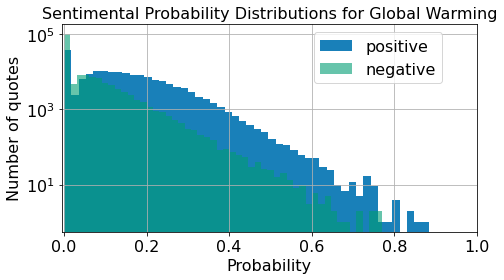

In [5]:
# Plotting Positive and Negative Probability Distributions

mpl.style.use('seaborn-colorblind')

fig = plt.figure(figsize=(7,4))

ax = fig.add_subplot(1, 1, 1)

plt.hist(gw_sent['positive scores'],label='positive', bins = 50, alpha=0.9)
plt.hist(gw_sent['negative scores'],label='negative', bins = 50, alpha=0.6)
plt.xlabel('Probability',fontsize = 16)
plt.ylabel('Number of quotes',fontsize = 16)
plt.xlim([-0.005,1])
plt.title('Sentimental Probability Distributions for Global Warming', fontsize = 16)
plt.grid()
ax.set_yscale('log')

# control location of the legend with bbox_to_anchor
plt.figlegend(ncol = 1,loc = 1, fontsize = 16, bbox_to_anchor=(0.4, 0.4, 0.5, 0.5))

# control the grid labels size
plt.tick_params(axis='both', which='major', labelsize=16)

# make the plot tight
plt.tight_layout()
None

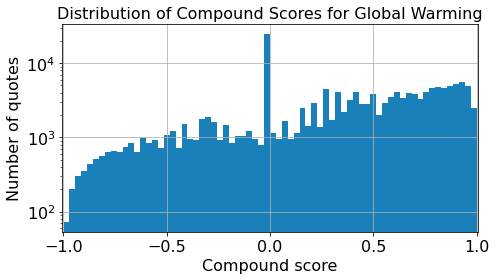

In [6]:
# Plotting the Compound Scores

fig = plt.figure(figsize=(7,4))

ax = fig.add_subplot(1, 1, 1)

plt.hist(gw_sent['compound scores'], bins = 70, alpha=0.9)
plt.xlabel('Compound score',fontsize = 16)
plt.ylabel('Number of quotes',fontsize = 16)
plt.xlim([-1.005,1.005])
plt.title('Distribution of Compound Scores for Global Warming', fontsize = 16)
plt.grid()
ax.set_yscale('log')

# control the grid labels size
plt.tick_params(axis='both', which='major', labelsize=16)

# make the plot tight
plt.tight_layout()

None

In [7]:
# splitting quotes into three categoreis: positive, negative, neutral
positive_gw=gw_sent[gw_sent['compound scores']>=0.05]
negative_gw=gw_sent[gw_sent['compound scores']<=-0.05]
neutral_gw=gw_sent[np.abs(gw_sent['compound scores']) < 0.05]

In [8]:
neutral_gw.describe()

,positive scores,negative scores,compound scores
count,26380.000000,26380.000000,26380.000000
mean,0.010279,0.009411,0.000332
std,0.033114,0.031387,0.008413
min,0.000000,0.000000,-0.049800
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000
max,0.388000,0.324000,0.049800


In [9]:
positive_gw.describe()

,positive scores,negative scores,compound scores
count,110164.000000,110164.000000,110164.000000
mean,0.185977,0.018335,0.601341
std,0.095838,0.034598,0.258020
min,0.014000,0.000000,0.050000
25%,0.114000,0.000000,0.381800
50%,0.171000,0.000000,0.636900
75%,0.241000,0.029000,0.831600
max,0.884000,0.343000,0.998800


In [10]:
negative_gw.describe()

,positive scores,negative scores,compound scores
count,29821.000000,29821.000000,29821.000000
mean,0.042987,0.146590,-0.423574
std,0.050780,0.081922,0.236398
min,0.000000,0.012000,-0.998500
25%,0.000000,0.088000,-0.599400
50%,0.031000,0.129000,-0.381800
75%,0.075000,0.185000,-0.249800
max,0.419000,0.770000,-0.050000


In [11]:
# print total number of positive, negative and neutral quotes
print('Number of quotes with a positive sentiment: {0} ({1} %)'.format(positive_gw.shape[0],round(positive_gw.shape[0]*100/gw_sent.shape[0],2)))
print('Number of quotes with a negative sentiment: {0} ({1} %)'.format(negative_gw.shape[0],round(negative_gw.shape[0]*100/gw_sent.shape[0],2)))
print('Number of quotes with a neutral sentiment: {0} ({1} %)'.format(neutral_gw.shape[0], round(neutral_gw.shape[0]*100/gw_sent.shape[0],2)))

Number of quotes with a positive sentiment: 110164 (66.22 %)
Number of quotes with a negative sentiment: 29821 (17.93 %)
Number of quotes with a neutral sentiment: 26380 (15.86 %)


In [12]:
# Exracting an example
neutral_gw.iloc[4]['quotation']

'Temperatures go up every year, so we got to try and mitigate that,'

### Abortion


In [13]:
ab_sent.head()

,quoteID,quotation,speaker,qids,date,probas,positive scores,negative scores,compound scores
Unnamed: 0,,,,,,,,,
1400011,2015-12-09-139783,"will push for energy development, beefed-up la...",Victor Davis Hanson,['Q1276395'],2015-12-09 06:33:51,"[['Victor Davis Hanson', '0.7887'], ['None', '...",0.064,0.104,-0.5719
1401214,2015-09-04-095700,"The revered Mother Teresa, who works in the st...",None,[],2015-09-04 21:09:20,"[['None', '0.8472'], ['Al Gore', '0.0952'], ['...",0.169,0.065,0.8350
1404392,2015-05-13-068629,We got done and she was standing on her head i...,Dennis Rodman,['Q201608'],2015-05-13 16:50:41,"[['Dennis Rodman', '0.6836'], ['Carmen Electra...",0.124,0.000,0.6249
1406420,2015-01-09-091216,while African Americans make up just 13 percen...,None,[],2015-01-09 23:38:13,"[['None', '0.9263'], ['Alveda King', '0.0737']]",0.000,0.000,0.0000
1409432,2015-09-23-016630,Conservatives worry about the way he seems to ...,Robert Royal,"['Q7349412', 'Q7349413']",2015-09-23 16:35:22,"[['Robert Royal', '0.8235'], ['None', '0.1318'...",0.092,0.249,-0.6486


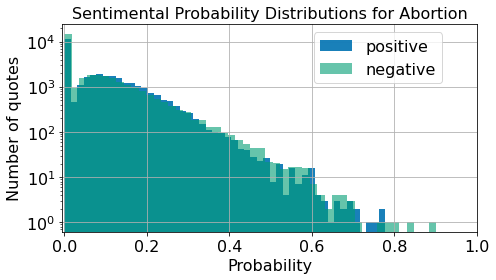

In [14]:
# Plotting Positive and Negative Probability Distributions
fig = plt.figure(figsize=(7,4))

ax = fig.add_subplot(1, 1, 1)

plt.hist(ab_sent['positive scores'],label='positive', bins = 50, alpha=0.9)
plt.hist(ab_sent['negative scores'],label='negative', bins = 50, alpha=0.6)
plt.xlabel('Probability',fontsize = 16)
plt.ylabel('Number of quotes',fontsize = 16)
plt.xlim([-0.005,1])
plt.title('Sentimental Probability Distributions for Abortion', fontsize = 16)
plt.grid()
ax.set_yscale('log')

# control location of the legend with bbox_to_anchor
plt.figlegend(ncol = 1,loc = 1, fontsize = 16, bbox_to_anchor=(0.4, 0.4, 0.5, 0.5))

# control the grid labels size
plt.tick_params(axis='both', which='major', labelsize=16)

# make the plot tight
plt.tight_layout()

None

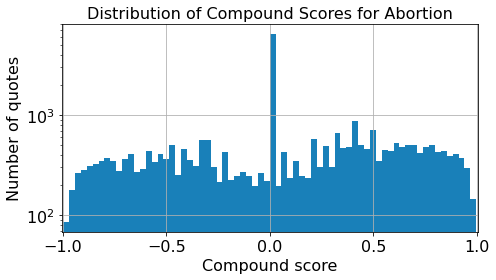

In [15]:
# Plotting the Compound Scores

fig = plt.figure(figsize=(7,4))

ax = fig.add_subplot(1, 1, 1)

plt.hist(ab_sent['compound scores'], bins = 70, alpha=0.9)
plt.xlabel('Compound score',fontsize = 16)
plt.ylabel('Number of quotes',fontsize = 16)
plt.xlim([-1.005,1.005])
plt.title('Distribution of Compound Scores for Abortion', fontsize = 16)
plt.grid()
ax.set_yscale('log')

# control the grid labels size
plt.tick_params(axis='both', which='major', labelsize=16)

# make the plot tight
plt.tight_layout()

None

In [16]:
# splitting quotes into three categoreis: positive, negative, neutral
positive_ab=ab_sent[ab_sent['compound scores']>=0.05]
negative_ab=ab_sent[ab_sent['compound scores']<=-0.05]
neutral_ab=ab_sent[np.abs(ab_sent['compound scores'])< 0.05]

In [17]:
neutral_ab.describe()

,positive scores,negative scores,compound scores
count,6801.000000,6801.000000,6801.000000
mean,0.010469,0.009852,0.000155
std,0.035739,0.034280,0.008437
min,0.000000,0.000000,-0.049800
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000
max,0.358000,0.344000,0.049800


In [18]:
positive_ab.describe()

,positive scores,negative scores,compound scores
count,14568.000000,14568.000000,14568.000000
mean,0.169490,0.031016,0.519866
std,0.091705,0.045643,0.249167
min,0.013000,0.000000,0.050000
25%,0.103750,0.000000,0.328375
50%,0.153000,0.000000,0.510600
75%,0.216000,0.058000,0.726900
max,0.778000,0.413000,0.996900


In [19]:
negative_ab.describe()

,positive scores,negative scores,compound scores
count,10997.000000,10997.000000,10997.000000
mean,0.041669,0.178907,-0.507684
std,0.052215,0.100372,0.251306
min,0.000000,0.012000,-0.998700
25%,0.000000,0.107000,-0.718400
50%,0.000000,0.158000,-0.497600
75%,0.075000,0.227000,-0.296000
max,0.338000,0.902000,-0.050700


In [20]:
# print total number of positive, negative and neutral quotes
print('Number of quotes with a positive sentiment: {0} ({1} %)'.format(positive_ab.shape[0],round(positive_ab.shape[0]*100/ab_sent.shape[0],2)))
print('Number of quotes with a negative sentiment: {0} ({1} %)'.format(negative_ab.shape[0],round(negative_ab.shape[0]*100/ab_sent.shape[0],2)))
print('Number of quotes with a neutral sentiment: {0} ({1} %)'.format(neutral_ab.shape[0], round(neutral_ab.shape[0]*100/ab_sent.shape[0],2)))

Number of quotes with a positive sentiment: 14568 (45.01 %)
Number of quotes with a negative sentiment: 10997 (33.98 %)
Number of quotes with a neutral sentiment: 6801 (21.01 %)


### Gender Inequality

In [21]:
gi_sent.head()

,quoteID,quotation,speaker,qids,date,probas,positive scores,negative scores,compound scores
Unnamed: 0,,,,,,,,,
3900322,2019-08-12-051728,Not only winning the World Cup with her amazin...,Taylor Swift,['Q26876'],2019-08-12 12:55:41,"[['Taylor Swift', '0.9038'], ['None', '0.0799'...",0.177,0.088,0.6717
3900920,2019-01-23-074654,"Our main mission is to breach the gender gap,",None,[],2019-01-23 05:46:04,"[['None', '0.9186'], ['Chang Liu', '0.0814']]",0.000,0.000,0.0000
3902699,2019-12-19-020869,"Growing up in Pakistan, I was a feminist befor...",Ziauddin Yousafzai,['Q8071389'],2019-12-19 17:03:35,"[['Ziauddin Yousafzai', '0.7561'], ['None', '0...",0.149,0.070,0.2144
3904083,2019-03-28-032705,"I didn't think I was breaking a trade secret, ...",Piers Morgan,['Q557758'],2019-03-28 04:09:36,"[['Piers Morgan', '0.8436'], ['None', '0.1361'...",0.000,0.000,0.0000
3904546,2019-01-25-095509,"The thing about misogyny is everyone does it,",None,[],2019-01-25 21:18:53,"[['None', '0.8255'], ['Karen Carpenter', '0.11...",0.000,0.000,0.0000


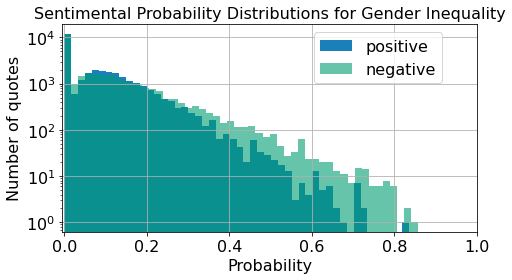

In [22]:
# Plotting Positive and Negative Probability Distributions

fig = plt.figure(figsize=(7,4))

ax = fig.add_subplot(1, 1, 1)

plt.hist(gi_sent['positive scores'],label='positive', bins = 50, alpha=0.9)
plt.hist(gi_sent['negative scores'],label='negative', bins = 50, alpha=0.6)
plt.xlabel('Probability',fontsize = 16)
plt.ylabel('Number of quotes',fontsize = 16)
plt.xlim([-0.005,1])
plt.title('Sentimental Probability Distributions for Gender Inequality', fontsize = 16)
plt.grid()
ax.set_yscale('log')

# control location of the legend with bbox_to_anchor
plt.figlegend(ncol = 1,loc = 1, fontsize = 16, bbox_to_anchor=(0.4, 0.4, 0.5, 0.5))

# control the grid labels size
plt.tick_params(axis='both', which='major', labelsize=16)

# make the plot tight
plt.tight_layout()

None

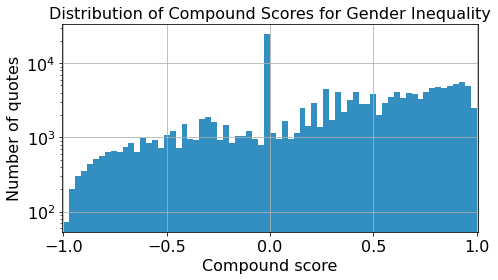

In [23]:
# Plotting the Compound Scores

fig = plt.figure(figsize=(7,4))

ax = fig.add_subplot(1, 1, 1)

plt.hist(gw_sent['compound scores'], bins = 70, alpha=0.8)
plt.xlabel('Compound score',fontsize = 16)
plt.ylabel('Number of quotes',fontsize = 16)
plt.xlim([-1.005,1.005])
plt.title('Distribution of Compound Scores for Gender Inequality', fontsize = 16)
plt.grid()
ax.set_yscale('log')

# control the grid labels size
plt.tick_params(axis='both', which='major', labelsize=16)

# make the plot tight
plt.tight_layout()

None

In [24]:
# splitting quotes into three categoreis: positive, negative, neutral
positive_gi=gi_sent[gi_sent['compound scores']>=0.05]
negative_gi=gi_sent[gi_sent['compound scores']<=-0.05]
neutral_gi=gi_sent[np.abs(gi_sent['compound scores'])< 0.05]

In [25]:
neutral_gi.describe()

,positive scores,negative scores,compound scores
count,5866.000000,5866.000000,5866.000000
mean,0.011061,0.010896,-0.000063
std,0.037339,0.036486,0.008252
min,0.000000,0.000000,-0.049800
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000
max,0.321000,0.347000,0.049800


In [26]:
positive_gi.describe()

,positive scores,negative scores,compound scores
count,12594.000000,12594.000000,12594.000000
mean,0.172278,0.035152,0.539809
std,0.095089,0.047189,0.257657
min,0.018000,0.000000,0.050000
25%,0.104000,0.000000,0.340000
50%,0.153000,0.000000,0.540950
75%,0.219000,0.062000,0.764400
max,0.835000,0.360000,0.997700


In [27]:
negative_gi.describe()

,positive scores,negative scores,compound scores
count,12805.000000,12805.000000,12805.000000
mean,0.042013,0.208127,-0.545223
std,0.053827,0.123236,0.262920
min,0.000000,0.017000,-0.997600
25%,0.000000,0.120000,-0.771300
50%,0.000000,0.180000,-0.571900
75%,0.077000,0.264000,-0.339200
max,0.412000,0.858000,-0.050200


In [28]:
# print total number of positive, negative and neutral quotes
print('Number of quotes with a positive sentiment: {0} ({1} %)'.format(positive_gi.shape[0],round(positive_gi.shape[0]*100/gi_sent.shape[0],2)))
print('Number of quotes with a negative sentiment: {0} ({1} %)'.format(negative_gi.shape[0],round(negative_gi.shape[0]*100/gi_sent.shape[0],2)))
print('Number of quotes with a neutral sentiment: {0} ({1} %)'.format(neutral_gi.shape[0], round(neutral_gi.shape[0]*100/gi_sent.shape[0],2)))

Number of quotes with a positive sentiment: 12594 (40.28 %)
Number of quotes with a negative sentiment: 12805 (40.96 %)
Number of quotes with a neutral sentiment: 5866 (18.76 %)


### Gun Control

In [29]:
gc_sent.head()

,quoteID,quotation,speaker,qids,date,probas,positive scores,negative scores,compound scores
Unnamed: 0,,,,,,,,,
408,2015-12-15-002818,a vitriolic attack on the twin pillars of Amer...,None,[],2015-12-15 07:34:41,"[['None', '0.5739'], ['Dana Loesch', '0.4261']]",0.188,0.277,-0.2500
3089,2015-02-20-038705,I'm in favor of students who have their concea...,Cary Smith,"['Q5047652', 'Q5047654']",2015-02-20 00:51:00,"[['Cary Smith', '0.7423'], ['None', '0.1626'],...",0.192,0.000,0.6124
7977,2015-09-19-042453,"scary sounding phrases like `assault weapons,'...",Donald Trump,"['Q22686', 'Q27947481']",2015-09-19 05:27:02,"[['Donald Trump', '0.7814'], ['None', '0.2186']]",0.095,0.561,-0.9042
8264,2015-10-13-054087,"It is a constitutionally-protected right, like...",Wendy Davis,"['Q3539529', 'Q47358063', 'Q59160484', 'Q79826...",2015-10-13 23:31:37,"[['Wendy Davis', '0.7397'], ['None', '0.2302']...",0.098,0.000,0.3612
11789,2015-04-19-040043,"This country, and especially the State of Texa...",None,[],2015-04-19 16:50:49,"[['None', '0.6643'], ['President Obama', '0.26...",0.117,0.161,-0.4449


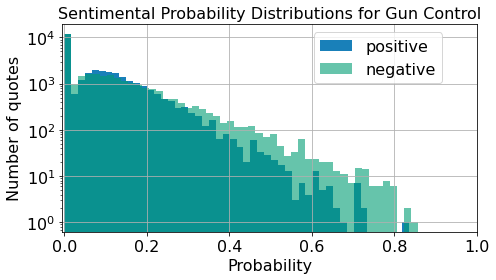

In [30]:
# Plotting Positive and Negative Probability Distributions

fig = plt.figure(figsize=(7,4))

ax = fig.add_subplot(1, 1, 1)

plt.hist(gi_sent['positive scores'],label='positive', bins = 50, alpha=0.9)
plt.hist(gi_sent['negative scores'],label='negative', bins = 50, alpha=0.6)
plt.xlabel('Probability',fontsize = 16)
plt.ylabel('Number of quotes',fontsize = 16)
plt.xlim([-0.005,1])
plt.title('Sentimental Probability Distributions for Gun Control', fontsize = 16)
plt.grid()
ax.set_yscale('log')

# control location of the legend with bbox_to_anchor
plt.figlegend(ncol = 1,loc = 1, fontsize = 16, bbox_to_anchor=(0.4, 0.4, 0.5, 0.5))

# control the grid labels size
plt.tick_params(axis='both', which='major', labelsize=16)

# make the plot tight
plt.tight_layout()

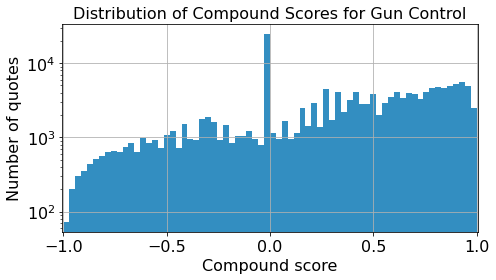

In [31]:
# Plotting the Compound Scores

fig = plt.figure(figsize=(7,4))

ax = fig.add_subplot(1, 1, 1)

plt.hist(gw_sent['compound scores'], bins = 70, alpha=0.8)
plt.xlabel('Compound score',fontsize = 16)
plt.ylabel('Number of quotes',fontsize = 16)
plt.xlim([-1.005,1.005])
plt.title('Distribution of Compound Scores for Gun Control', fontsize = 16)
plt.grid()
ax.set_yscale('log')

# control the grid labels size
plt.tick_params(axis='both', which='major', labelsize=16)

# make the plot tight
plt.tight_layout()

None

In [32]:
# splitting quotes into three categoreis: positive, negative, neutral
positive_gc=gc_sent[gc_sent['compound scores']>=0.05]
negative_gc=gc_sent[gc_sent['compound scores']<=-0.05]
neutral_gc=gc_sent[np.abs(gc_sent['compound scores'])< 0.05]

In [33]:
neutral_gc.describe()

,positive scores,negative scores,compound scores
count,1819.000000,1819.000000,1819.000000
mean,0.032789,0.032465,0.000151
std,0.062027,0.061559,0.013459
min,0.000000,0.000000,-0.049800
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.049500,0.048500,0.000000
max,0.321000,0.312000,0.049800


In [34]:
positive_gc.describe()

,positive scores,negative scores,compound scores
count,6244.000000,6244.000000,6244.000000
mean,0.191861,0.056182,0.494335
std,0.093287,0.062029,0.259323
min,0.020000,0.000000,0.050000
25%,0.124000,0.000000,0.273200
50%,0.175000,0.046000,0.486250
75%,0.244000,0.096000,0.709600
max,0.636000,0.338000,0.994400


In [35]:
negative_gc.describe()

,positive scores,negative scores,compound scores
count,10289.000000,10289.000000,10289.000000
mean,0.050132,0.237751,-0.586073
std,0.058104,0.127675,0.257664
min,0.000000,0.020000,-0.998700
25%,0.000000,0.145000,-0.822100
50%,0.035000,0.211000,-0.612400
75%,0.088000,0.300000,-0.340000
max,0.476000,0.906000,-0.050500


In [36]:
# print total number of positive, negative and neutral quotes
print('Number of quotes with a positive sentiment: {0} ({1} %)'.format(positive_gc.shape[0],round(positive_gc.shape[0]*100/gc_sent.shape[0],2)))
print('Number of quotes with a negative sentiment: {0} ({1} %)'.format(negative_gc.shape[0],round(negative_gc.shape[0]*100/gc_sent.shape[0],2)))
print('Number of quotes with a neutral sentiment: {0} ({1} %)'.format(neutral_gc.shape[0], round(neutral_gc.shape[0]*100/gc_sent.shape[0],2)))

Number of quotes with a positive sentiment: 6244 (34.02 %)
Number of quotes with a negative sentiment: 10289 (56.06 %)
Number of quotes with a neutral sentiment: 1819 (9.91 %)


#### Overall data

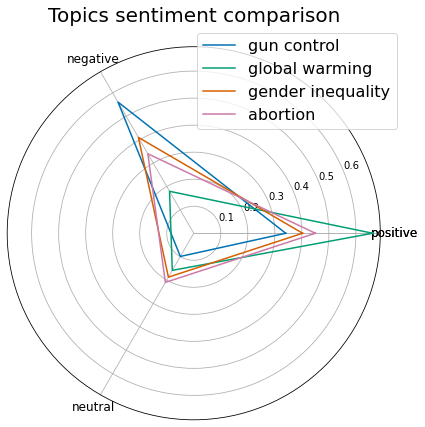

In [38]:
#Plotting topics percentage over categories
categories = ['positive','negative','neutral']
categories = [*categories, categories[0]]

#Finding percentage
gc_stat = [positive_gc.shape[0]/gc_sent.shape[0],negative_gc.shape[0]/gc_sent.shape[0],neutral_gc.shape[0]/gc_sent.shape[0]]
gw_stat = [positive_gw.shape[0]/gw_sent.shape[0],negative_gw.shape[0]/gw_sent.shape[0],neutral_gw.shape[0]/gw_sent.shape[0]]
gi_stat = [positive_gi.shape[0]/gi_sent.shape[0],negative_gi.shape[0]/gi_sent.shape[0],neutral_gi.shape[0]/gi_sent.shape[0]]
ab_stat = [positive_ab.shape[0]/ab_sent.shape[0],negative_ab.shape[0]/ab_sent.shape[0],neutral_ab.shape[0]/ab_sent.shape[0]]

gc_stat = [*gc_stat, gc_stat[0]]
gw_stat = [*gw_stat, gw_stat[0]]
gi_stat = [*gi_stat, gi_stat[0]]
ab_stat = [*ab_stat, ab_stat[0]]

label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(gc_stat))

fig = plt.figure(figsize=(6, 6))
plt.subplot(polar=True)
plt.plot(label_loc, gc_stat, label='gun control')
plt.plot(label_loc, gw_stat, label='global warming')
plt.plot(label_loc, gi_stat, label='gender inequality')
plt.plot(label_loc, ab_stat, label='abortion')
plt.title('Topics sentiment comparison', size=20, y=1.05)
lines, labels = plt.thetagrids(np.degrees(label_loc), labels=categories, fontsize=12)
plt.figlegend(ncol = 1,loc = 1, fontsize = 16, bbox_to_anchor=(0.45, 0.44, 0.5, 0.5))
plt.tight_layout()
plt.show()


# Save figure
fig.savefig('Figures/Topics_sent_comp.jpeg', dpi=200)
fig.savefig('Figures/Topics_sent_comp.pdf')